# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [62]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&appid={weather_api_key}&units=imperial"
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
         print("City not found. Skipping...")
         pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gaoping
Processing Record 2 of Set 1 | stanley
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | dhana
Processing Record 6 of Set 1 | cabo san lucas
Processing Record 7 of Set 1 | t'aebaek
Processing Record 8 of Set 1 | kolwezi
Processing Record 9 of Set 1 | bilibino
Processing Record 10 of Set 1 | saint croix
Processing Record 11 of Set 1 | touros
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | potam
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | estacion coahuila
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | college
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 21 of Set 1 | gao
Processing Record 22 of Set 1 | mount pe

In [95]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          597
Lat           597
Lng           597
Max Temp      597
Humidity      597
Cloudiness    597
Wind Speed    597
Country       597
Date          597
dtype: int64

In [96]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,gaoping,30.7758,106.1029,83.50,46,100,3.91,CN,1686448042
1,stanley,54.8680,-1.6985,52.70,94,0,2.30,GB,1686447763
2,thompson,55.7435,-97.8558,73.56,25,20,10.36,CA,1686448025
3,port-aux-francais,-49.3500,70.2167,39.33,67,99,30.56,TF,1686448028
4,dhana,23.7500,78.8500,91.89,30,52,17.81,IN,1686448044


In [97]:
# Export the City_Data into a csv
city_data_df.to_csv(r'C:\Homework\python-API-challenge\WeatherPy\output_data\cities.csv', index_label="City_ID")

In [98]:
# Read saved data
city_data_df = pd.read_csv(r'C:\Homework\python-API-challenge\WeatherPy\output_data\cities.csv', index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gaoping,30.7758,106.1029,83.50,46,100,3.91,CN,1686448042
1,stanley,54.8680,-1.6985,52.70,94,0,2.30,GB,1686447763
2,thompson,55.7435,-97.8558,73.56,25,20,10.36,CA,1686448025
3,port-aux-francais,-49.3500,70.2167,39.33,67,99,30.56,TF,1686448028
4,dhana,23.7500,78.8500,91.89,30,52,17.81,IN,1686448044


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

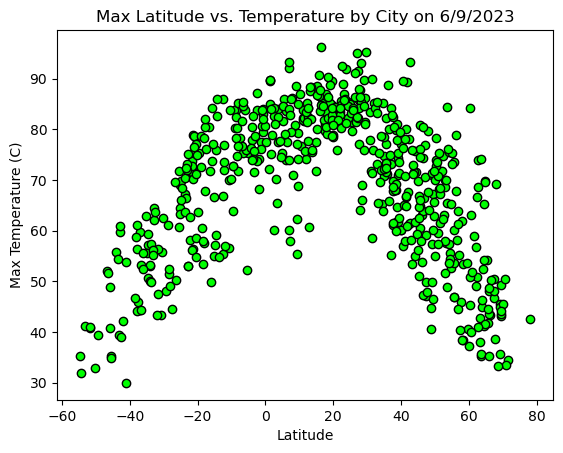

In [99]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Max Temp"].astype("float")
plt.scatter(x_values, y_values, color = "lime", edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("Max Latitude vs. Temperature by City on 6/9/2023")

# Save the figure
plt.savefig(r'C:\Homework\python-API-challenge\WeatherPy\output_data\Fig1.png')

# Show plot
plt.show()

#### Latitude Vs. Humidity

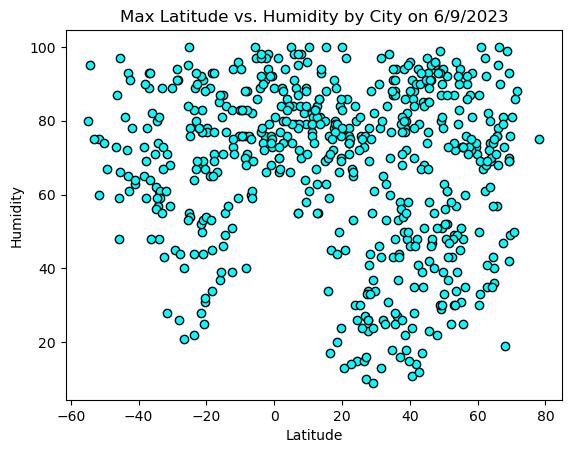

In [100]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Humidity"].astype("float")
plt.scatter(x_values, y_values, color = "cyan", edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Max Latitude vs. Humidity by City on 6/9/2023")

# Save the figure
plt.savefig(r'C:\Homework\python-API-challenge\WeatherPy\output_data\Fig2.png')

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

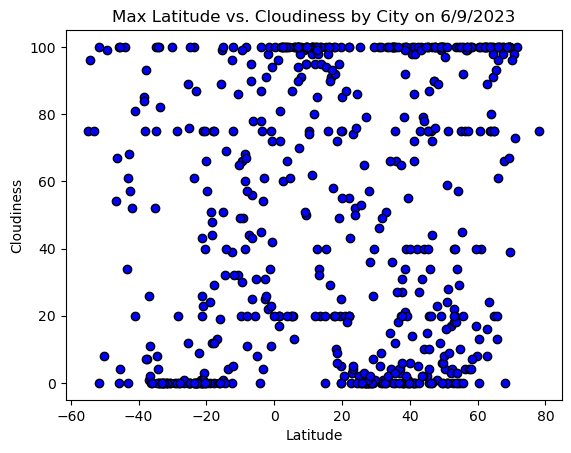

In [101]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Cloudiness"].astype("float")
plt.scatter(x_values, y_values, color = "blue", edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Max Latitude vs. Cloudiness by City on 6/9/2023")

# Save the figure
plt.savefig(r'C:\Homework\python-API-challenge\WeatherPy\output_data\Fig3.png')

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

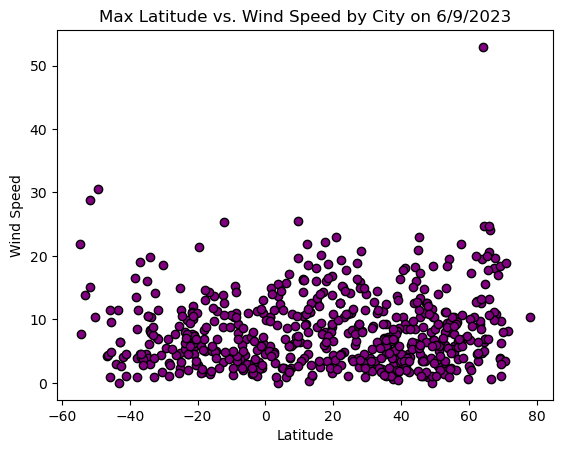

In [102]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Wind Speed"].astype("float")
plt.scatter(x_values, y_values, color = "purple", edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Max Latitude vs. Wind Speed by City on 6/9/2023")

# Save the figure
plt.savefig(r'C:\Homework\python-API-challenge\WeatherPy\output_data\Fig4.png')

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [136]:
# Define a function to create Linear Regression plots

def create_reg_graph(x_values, y_values, x_label, y_label, hemisphere, eq_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # code the regression values
    regress_values = x_values * slope + intercept

    #code the line equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    #code to create each plot
    plt.scatter(x_values, y_values, edgecolor= "black", color="lightblue")
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, xy=eq_coordinates, fontsize = 15, color = "red")
    plt.title(f'{hemisphere} Hemisphere - {x_label} vs. {y_label}by City on 6/9/2023')
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    print(f'The r-value is {rvalue}')

In [104]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"]>= 0, :])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gaoping,30.7758,106.1029,83.50,46,100,3.91,CN,1686448042
1,stanley,54.8680,-1.6985,52.70,94,0,2.30,GB,1686447763
2,thompson,55.7435,-97.8558,73.56,25,20,10.36,CA,1686448025
4,dhana,23.7500,78.8500,91.89,30,52,17.81,IN,1686448044
5,cabo san lucas,22.8909,-109.9124,88.90,67,3,15.10,MX,1686448005


In [105]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"]< 0, :])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,port-aux-francais,-49.3500,70.2167,39.33,67,99,30.56,TF,1686448028
7,kolwezi,-10.7148,25.4667,56.61,59,32,4.05,CD,1686448045
10,touros,-5.1989,-35.4608,75.33,86,8,11.07,BR,1686448042
11,avarua,-21.2078,-159.7750,78.85,83,20,5.75,CK,1686448046
14,grytviken,-54.2811,-36.5092,31.95,95,96,7.65,GS,1686448047


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.725380129400214


<function matplotlib.pyplot.show(close=None, block=None)>

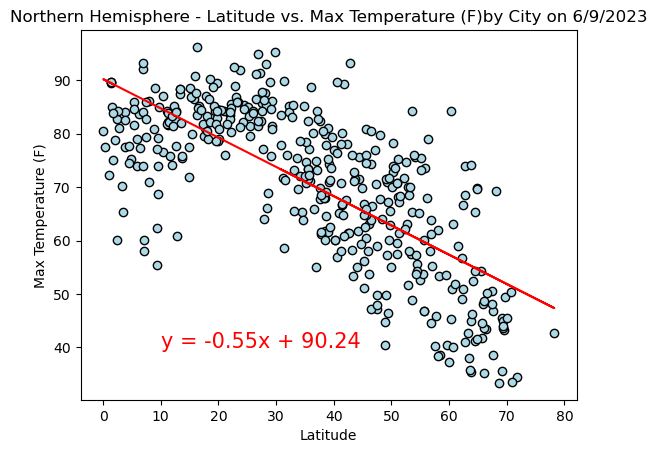

In [137]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Max Temp"].astype("float")
create_reg_graph(x_values, y_values, "Latitude", "Max Temperature (F)", "Northern", (10,40))
plt.show

The r-value is 0.8041733792256651


<function matplotlib.pyplot.show(close=None, block=None)>

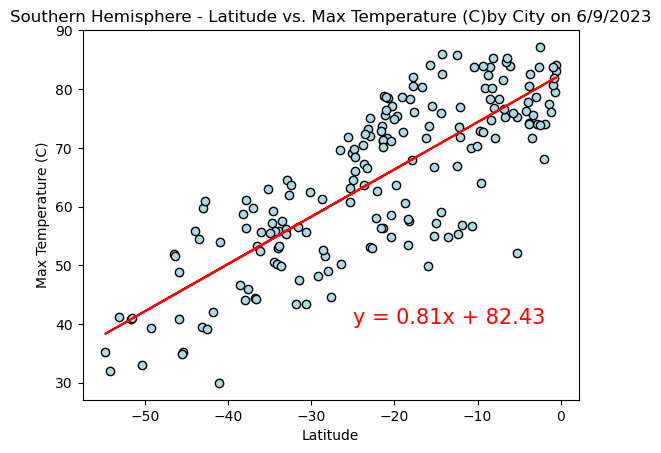

In [138]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Max Temp"].astype("float")
create_reg_graph(x_values, y_values, "Latitude", "Max Temperature (C)", "Southern", (-25,40))
plt.show

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is -0.11500661144411194


<function matplotlib.pyplot.show(close=None, block=None)>

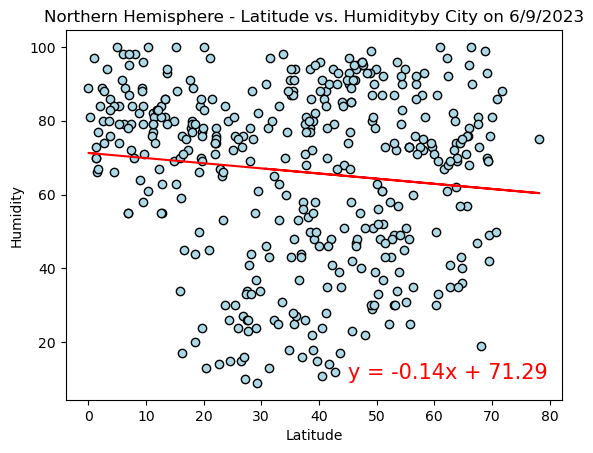

In [139]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Humidity"].astype("float")
create_reg_graph(x_values, y_values, "Latitude", "Humidity", "Northern", (45,10))
plt.show

The r-value is 0.14434500128997496


<function matplotlib.pyplot.show(close=None, block=None)>

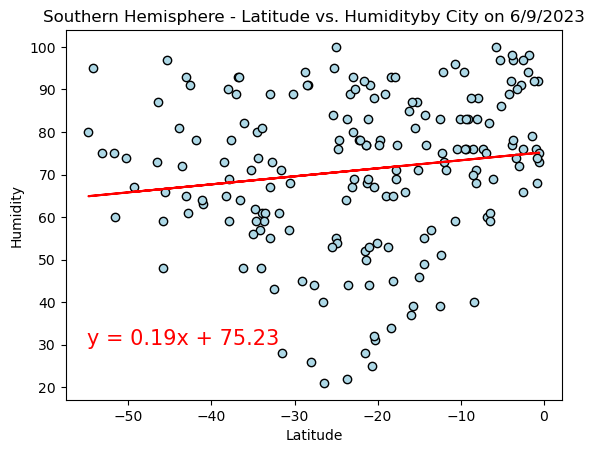

In [140]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Humidity"].astype("float")
create_reg_graph(x_values, y_values, "Latitude", "Humidity", "Southern", (-55,30))
plt.show

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is -0.02926662841133265


<function matplotlib.pyplot.show(close=None, block=None)>

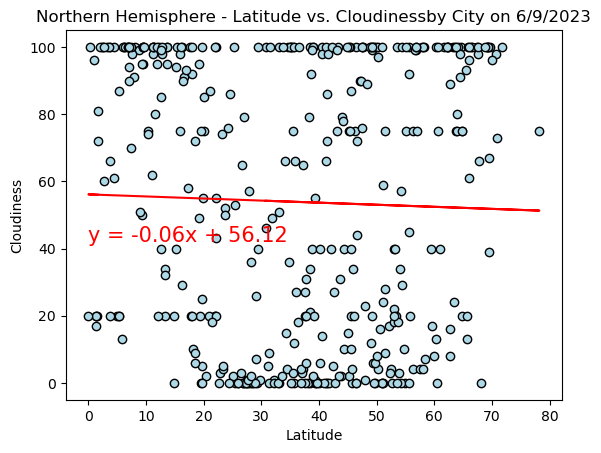

In [141]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Cloudiness"].astype("float")
create_reg_graph(x_values, y_values, "Latitude", "Cloudiness", "Northern", (0,42))
plt.show

The r-value is 0.06816096734810034


<function matplotlib.pyplot.show(close=None, block=None)>

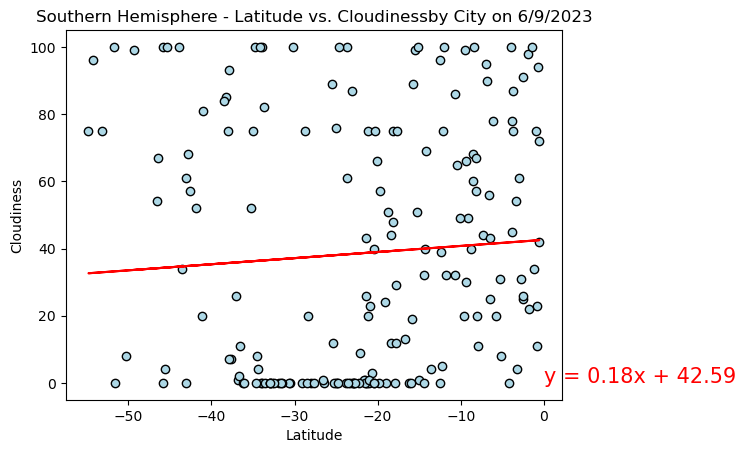

In [142]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Cloudiness"].astype("float")
create_reg_graph(x_values, y_values, "Latitude", "Cloudiness", "Southern", (0,0))
plt.show

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.0303393907847246


<function matplotlib.pyplot.show(close=None, block=None)>

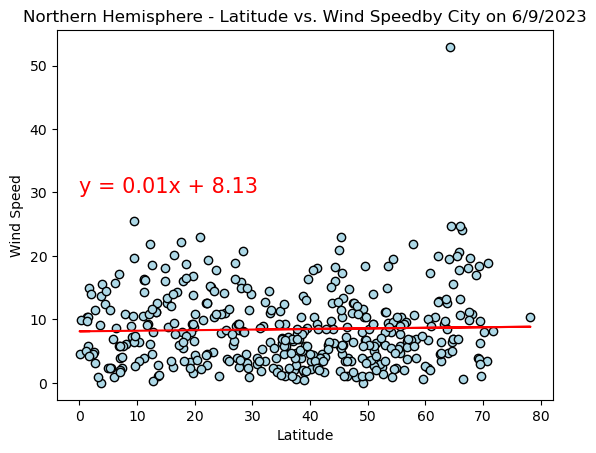

In [144]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Wind Speed"].astype("float")
create_reg_graph(x_values, y_values, "Latitude", "Wind Speed", "Northern", (0,30))
plt.show

The r-value is -0.204416109843361


<function matplotlib.pyplot.show(close=None, block=None)>

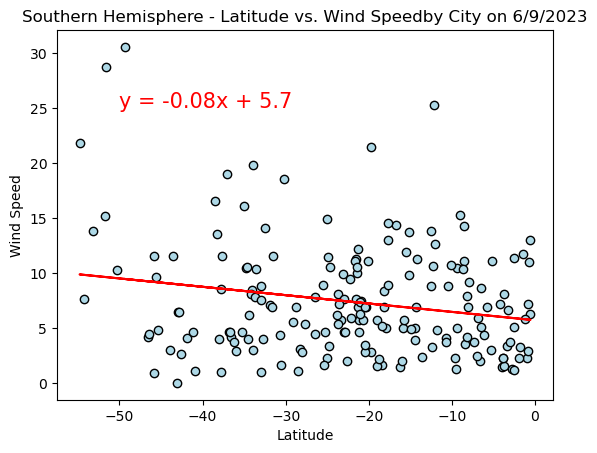

In [145]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Wind Speed"].astype("float")
create_reg_graph(x_values, y_values, "Latitude", "Wind Speed", "Southern", (-50,25))
plt.show

**Discussion about the linear relationship:** YOUR RESPONSE HERE